In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# read into the csv file and assign it a dataframe
traffic_path = "traffic.csv"
traffic_df = pd.read_csv(traffic_path)

### Data cleaning and formatting

In [45]:
# select columns that we want
traffic_df = traffic_df[["TIME","SPEED","BUS_COUNT","NUM_READS","MONTH"]]
# convert items in time column to datetime-type items and 
traffic_df["TIME"] = pd.to_datetime(traffic_df["TIME"])
# retrive information of month,day and year respectively
traffic_df["MONTH"]= traffic_df["TIME"].dt.month
traffic_df["DAY"] = traffic_df["TIME"].dt.day
traffic_df["YEAR"] = traffic_df["TIME"].dt.year
# relocate the columns and rows
traffic_df = traffic_df[["TIME","YEAR","MONTH","DAY","SPEED","BUS_COUNT","NUM_READS"]]
traffic_df = traffic_df.sort_values(["YEAR","MONTH"],ascending=True)
# select the rows that we want to match the time period of traffic and that of air quality together, drop rows from 2020 May to 2018 July
traffic_df = traffic_df.drop(traffic_df[(traffic_df["YEAR"]==2020)&((traffic_df["MONTH"]==5)|(traffic_df["MONTH"]==6)|(traffic_df["MONTH"]==7))].index)
traffic_df

,TIME,YEAR,MONTH,DAY,SPEED,BUS_COUNT,NUM_READS
2,2018-03-13 09:40:38,2018,3,13,12.95,165,2607
3,2018-03-13 18:31:33,2018,3,13,12.27,158,2333
4,2018-03-13 09:50:55,2018,3,13,14.32,144,2049
5,2018-03-14 04:10:21,2018,3,14,22.50,6,79
6,2018-03-13 10:01:37,2018,3,13,13.64,126,1916
...,...,...,...,...,...,...,...
107406,2020-04-30 23:10:51,2020,4,30,24.55,27,418
107407,2020-04-30 23:21:09,2020,4,30,23.18,25,554
107409,2020-04-30 23:31:23,2020,4,30,23.39,25,438
107410,2020-04-30 23:40:33,2020,4,30,23.86,21,373


In [46]:
ym_df=traffic_df.groupby(["YEAR","MONTH"])
ym_df.count().head(10)

TIME   DAY  SPEED  BUS_COUNT  NUM_READS
YEAR MONTH                                         
2018 3      3034  3034   3034       3034       3034
     4      3850  3850   3850       3850       3850
     5      4148  4148   4148       4148       4148
     6      4132  4132   4132       4132       4132
     7      4310  4310   4310       4310       4310
     8      3856  3856   3856       3856       3856
     9      4141  4141   4141       4141       4141
     10     4271  4271   4271       4271       4271
     11     3938  3938   3938       3938       3938
     12     4233  4233   4233       4233       4233

Stored 'smonthly_avg' (Series)
Stored 'bmonthly_avg' (Series)
Stored 'nmonthly_avg' (Series)


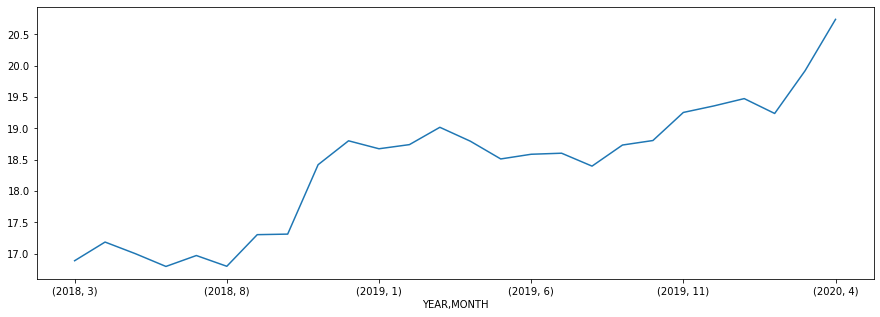

In [47]:
smonthly_avg=ym_df["SPEED"].mean()
bmonthly_avg=ym_df["BUS_COUNT"].mean()
nmonthly_avg=ym_df["NUM_READS"].mean()

%store smonthly_avg
%store bmonthly_avg
%store nmonthly_avg

#nu=[smonthly_avg,bmonthly_avg,nmonthly_avg]

#major_avg= [x for x in nu]    
smonthly_avg.plot(kind="line",figsize=(15,5))

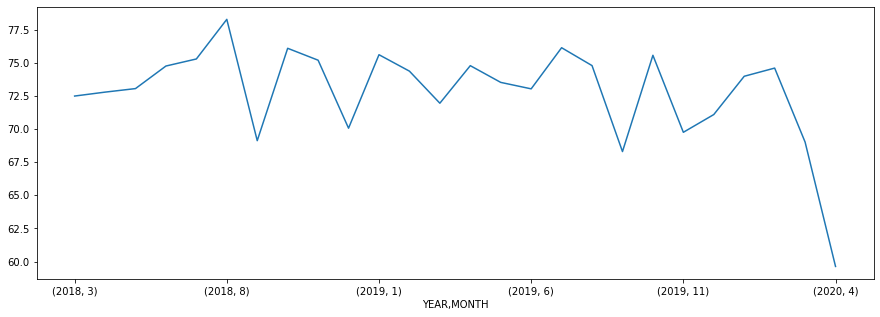

In [39]:
bmonthly_avg.plot(kind="line",figsize=(15,5))

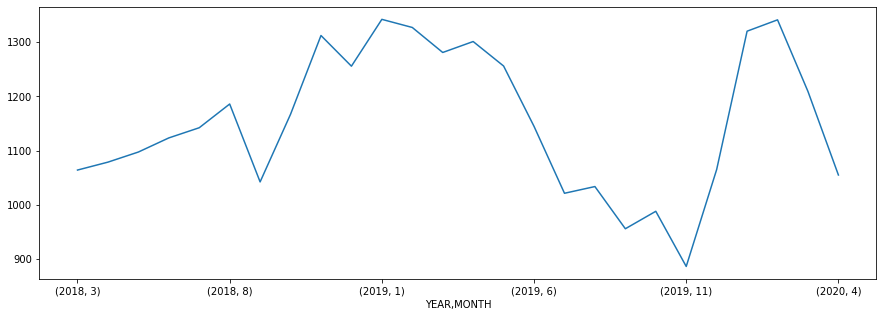

In [41]:
plot(nmonthly_avg)